In [1]:
from src.data import CICIDS2017
from src.data.utils import balanced_sample, encode_labels
from sklearn.model_selection import train_test_split
from src.models.ml import PreConfigured_LogisticRegression, PreConfigured_RandomForest, PreConfigured_LinearSVC, PreConfigured_DecisionTree, PreConfigured_KNeighbors
from src.pipelines.utils import train_and_evaluate, plot_accuracies

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [11]:
data = CICIDS2017()
data.load()
data = balanced_sample(data.data, "Label", 100)
# x, y = encode_labels(data, "Label")
x = data.drop(columns=["Label"]).values
y = data["Label"].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


2025-03-05 05:30:34,922 - INFO - Loading dataset...


In [12]:
logreg = PreConfigured_LogisticRegression()
svc = PreConfigured_LinearSVC()
randomforest = PreConfigured_RandomForest()
kneighbors = PreConfigured_KNeighbors()
decision_tree = PreConfigured_DecisionTree()


c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
2025-03-05 05:31:10,111 - INFO - Cross-validation scores: [0.79411765 0.74509804 0.75490196 0.81372549 0.77227723 0.8019802
 0.81188119 0.82178218 0.79207921 0.83168317]
2025-03-05 05:31:10,111 - INFO - Mean cross-validation score: 0.7940
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings

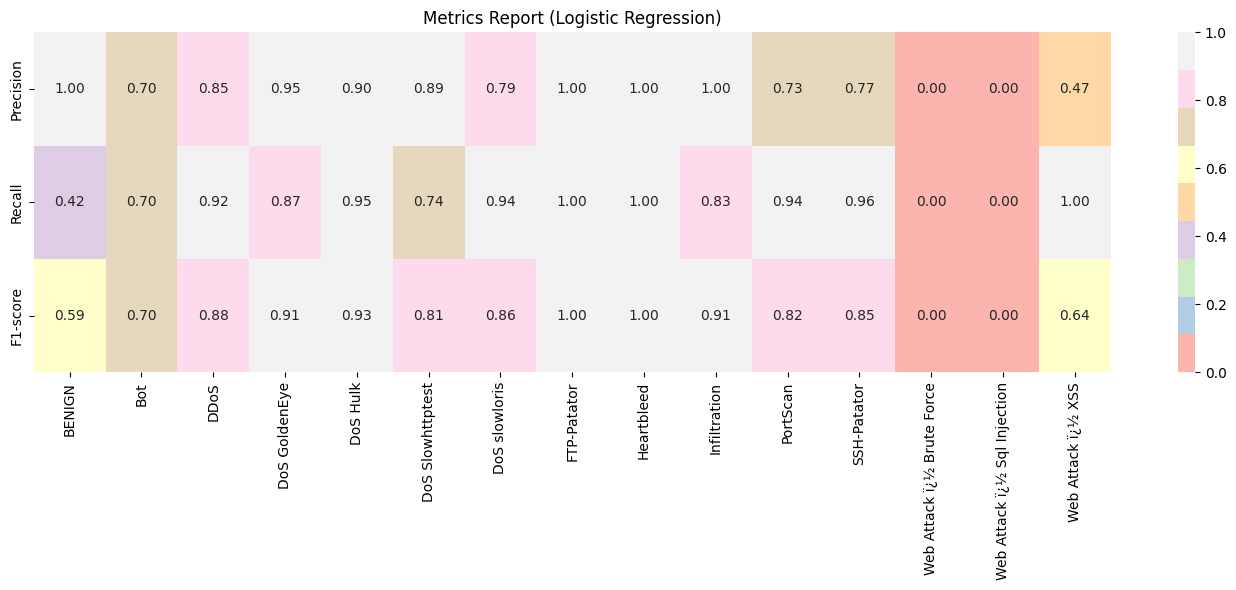

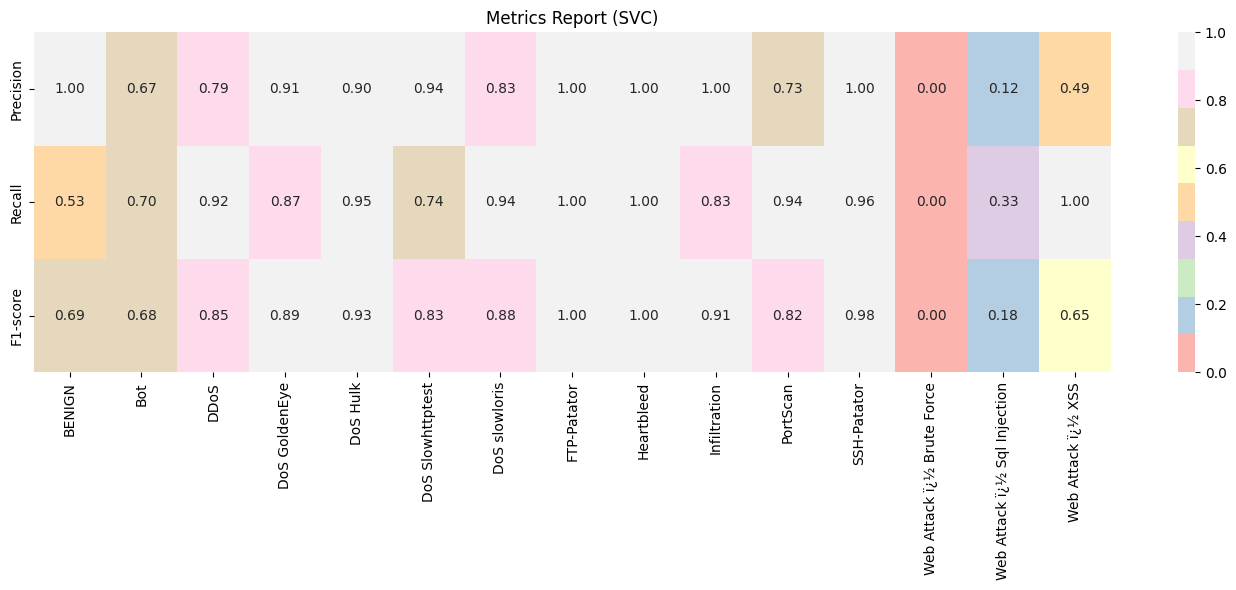

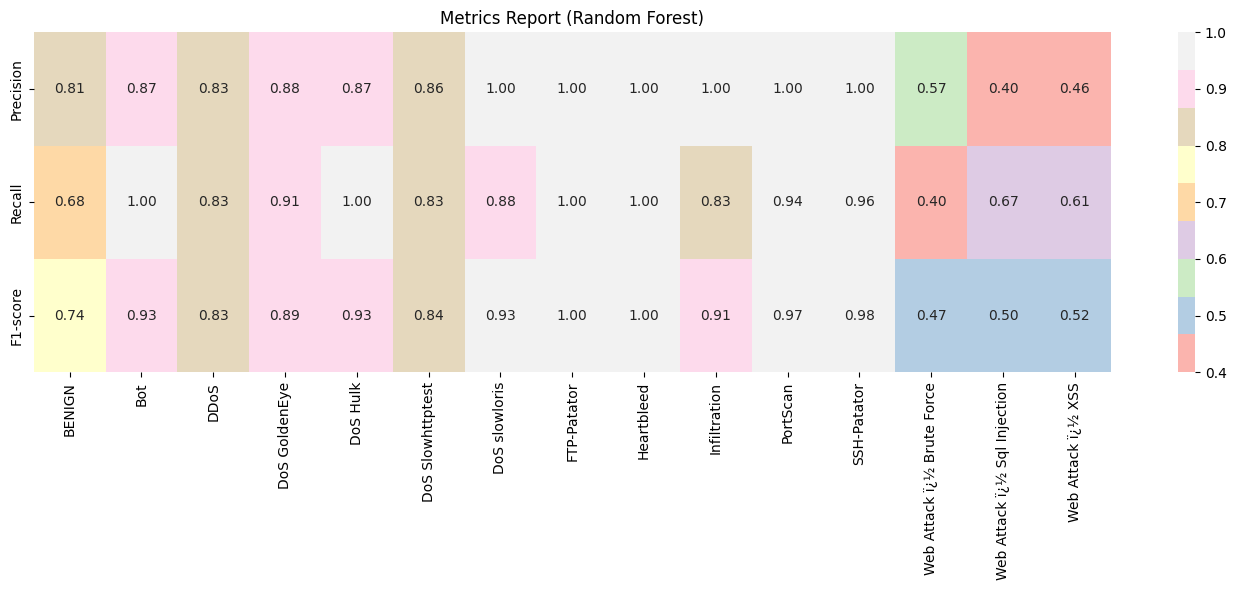

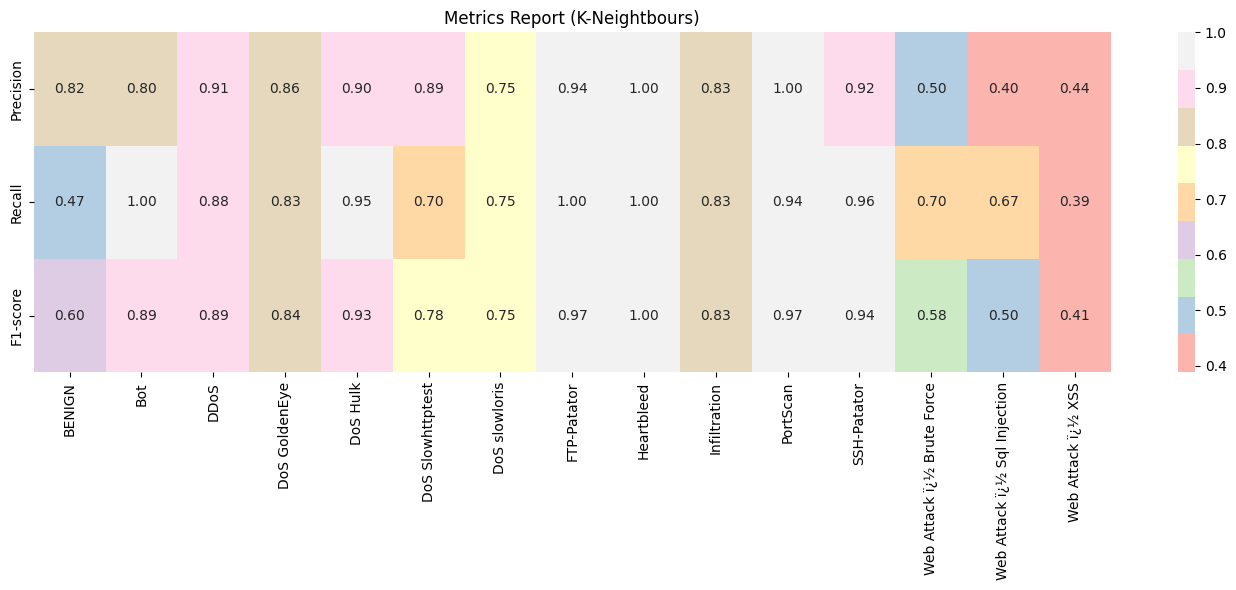

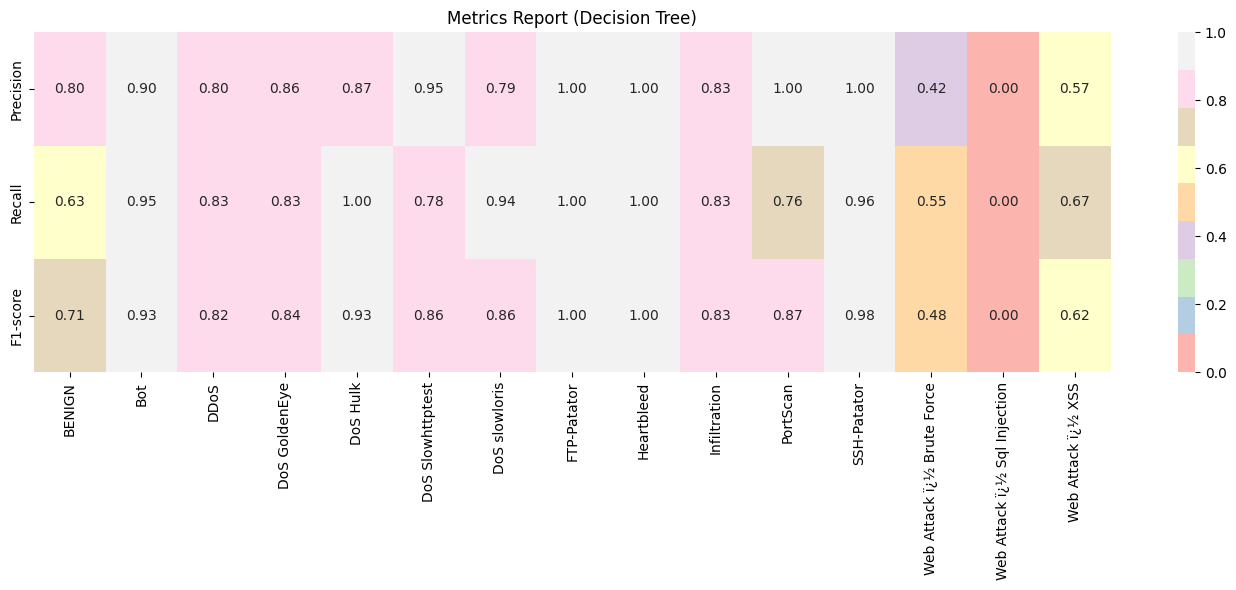

In [13]:
logreg_results = train_and_evaluate(
    logreg,
    "Logistic Regression",
    X_train,
    y_train,
    X_test,
    y_test,
    cv=10
)

svc_results = train_and_evaluate(
    svc,
    "SVC",
    X_train,
    y_train,
    X_test,
    y_test,
    cv=10
)

randomforest_results = train_and_evaluate(
    randomforest,
    "Random Forest",
    X_train,
    y_train,
    X_test,
    y_test,
    cv=5
)

kneighbors_results = train_and_evaluate(
    kneighbors,
    "K-Neightbours",
    X_train,
    y_train,
    X_test,
    y_test,
    cv=5
)

decision_tree_results = train_and_evaluate(
    decision_tree,
    "Decision Tree",
    X_train,
    y_train,
    X_test,
    y_test,
    cv=5
)

In [9]:
accuracies = [
    logreg_results["accuracy"],
    svc_results["accuracy"],
    randomforest_results["accuracy"],
    kneighbors_results["accuracy"],
    decision_tree_results["accuracy"]
]

models_names = ['Logistic Regression', 'SVM', "Random Forest", "KNeighbors", "Decision Tree"]

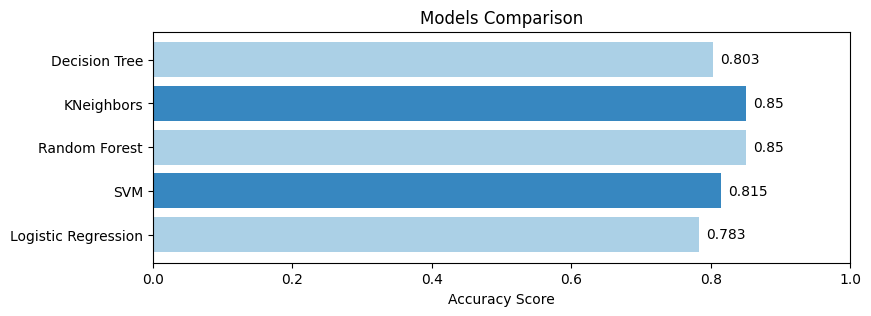

In [10]:
fig = plot_accuracies(accuracies, models_names)